## Baseline Scenario

Proportional fair split (dynamic) given an oracle that know the exact current number of associated users and sensors. Use estimated average traffic request per UE and per sensor.


In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

# predefined smart city scenario
from mobile_env.scenarios.smart_city import MComSmartCity

In [2]:
env = gym.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 5 users, 20 sensors and 1 cells.


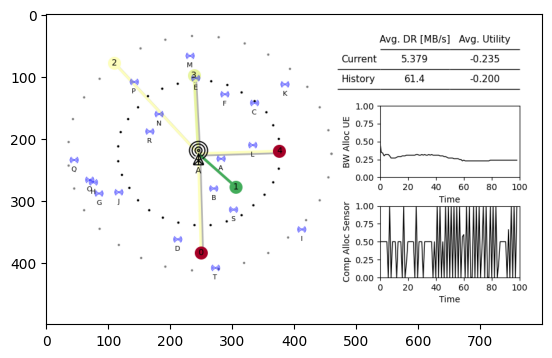

In [3]:
from IPython import display

done = False
obs, info = env.reset()

dummy_action = [0.50, 0.50]

for _ in range(100):
    obs, reward, terminated, truncated, info = env.step(tuple(dummy_action))

    # Get the latest metrics from the environment
    scalar_results, _, _, bs_results, _ = env.monitor.load_results()

    # Retrieve the last traffic requests for users (UEs) and sensors
    ue_traffic_requests = scalar_results["total traffic request ue"].iloc[-1]
    sensor_traffic_requests = scalar_results["total traffic request sensor"].iloc[-1]

    # Retrieve the last computation requests for users (UEs) and sensors
    ue_computation_requests =  bs_results["queue size transferred UE jobs"].iloc[-1]
    sensor_computation_requests = bs_results["queue size transferred sensor jobs"].iloc[-1]

    # Calculate the total traffic requests
    total_traffic_requests = ue_traffic_requests + sensor_traffic_requests

    # Calculate the total computation requests
    total_computation_requests = ue_computation_requests + sensor_computation_requests

    # Avoid division by zero
    if total_traffic_requests == 0:
        dummy_action[0] = 0.5  # Default split in case no traffic
    else:
        # Proportional allocation based on traffic requests
        dummy_action[0] = ue_traffic_requests / total_traffic_requests
    
    if total_computation_requests == 0:
        dummy_action[1] = 0.5
    else:
        dummy_action[1] = ue_computation_requests / total_computation_requests

    if terminated or truncated:
        break

    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [4]:
scalar_results, kpi_results, ue_results, bs_results, ss_results = env.monitor.load_results()

scalar_results

,number UE connections,number sensor conncections,total traffic request ue,total traffic request sensor,delayed UE packets,delayed sensor packets,mean utility,mean utility sensor,mean datarate,mean datarate sensor
Time Step,,,,,,,,,,
0,5,20,40.173493,75.430633,0,0,0.039419,-0.675996,1.765301,1.098451
1,5,20,78.921304,150.665803,0,0,-0.219594,-0.571738,1.250438,1.362312
2,5,20,99.938688,229.177354,0,0,-0.151529,-0.565578,1.596523,2.110120
3,5,20,137.542677,288.510178,0,0,-0.351612,-0.534288,0.479202,2.943599
4,5,20,160.365951,345.999091,0,2,-0.212901,-0.528487,1.435345,15.591418
...,...,...,...,...,...,...,...,...,...,...
95,5,20,1761.272405,5574.440956,0,10,-0.302702,-0.507920,1.580798,2.207404
96,5,20,1790.287399,5638.242808,1,0,-0.269477,-0.484996,6.281016,2.670148
97,5,20,1816.413810,5662.143288,0,8,-0.285478,-0.449271,1.974718,13.047024


In [5]:
kpi_results

,bw allocation UE,bw allocation sensor,comp. allocation UE,comp. allocation sensor,total delayed packets,reward,reward cumulative,total aori,total aosi,total throughput ue,total throughput sensor
Time Step,,,,,,,,,,,
0,0.50,0.50,0.5,0.5,0,0.00,0.00,0.0,0.0,8.826507,18.569367
1,0.35,0.65,0.5,0.5,0,0.00,0.00,0.0,0.0,6.252189,20.764831
2,0.34,0.66,0.5,0.5,0,9.02,9.02,2.0,2.0,7.982616,31.488449
3,0.30,0.70,0.5,0.5,0,0.00,9.02,0.0,0.0,2.396010,37.667176
4,0.32,0.68,0.5,0.5,0,0.00,9.02,0.0,0.0,7.176726,42.511087
...,...,...,...,...,...,...,...,...,...,...,...
95,0.24,0.76,0.0,1.0,0,0.00,24.29,0.0,0.0,7.903989,40.110861
96,0.24,0.76,1.0,0.0,1,4.50,28.79,7.0,7.0,8.985006,34.198148
97,0.24,0.76,0.0,1.0,0,0.00,28.79,0.0,0.0,9.873590,66.099521


In [6]:
ue_results

Metric           AoRI  AoSI  distance UE-station  traffic request  \
Time Step UE ID                                                     
0         0       NaN   NaN            58.457556     7.242585e+00   
          1       NaN   NaN           110.874807     8.413124e+00   
          2       NaN   NaN           122.207981     7.568290e+00   
          3       NaN   NaN            94.300447     6.994481e+00   
          4       NaN   NaN            75.313075     9.955013e+00   
...               ...   ...                  ...              ...   
99        0       NaN   NaN            79.815138     6.431547e+02   
          1       NaN   NaN            38.566752     5.684342e-14   
          2       NaN   NaN            94.049429     6.568346e+02   
          3       NaN   NaN            63.562995     3.187479e+01   
          4       NaN   NaN            58.535843     5.288433e+02   

Metric           user datarate  user queue size  user throughput  user utility  
Time Step UE ID                                                                 
0         0           4.757415              1.0         4.757415      0.338686  
          1           0.586876              1.0         0.586876     -0.115727  
          2           0.431710              1.0         0.431710     -0.182404  
          3           1.005519              1.0         1.005519      0.001195  
          4           2.044987              1.0         2.044987      0.155345  
...                        ...              ...              ...           ...  
99        0           1.742593             63.0         1.742593      0.120598  
          1           8.978553              0.0         0.000000      0.476603  
          2           0.000000             67.0         0.000000     -1.000000  
          3           0.000000              3.0         0.000000     -1.000000  
          4           5.157576             53.0         5.157576      0.356223  

[500 rows x 8 columns]

In [7]:
ss_results

Metric               distance sensor-station  sensor datarate  \
Time Step Sensor ID                                             
0         0                        16.492423         0.000000   
          1                        30.083218         0.000000   
          2                        57.280014         5.390609   
          3                        70.611614         2.659156   
          4                        61.032778         4.350737   
...                                      ...              ...   
99        15                       74.027022         0.000000   
          16                       89.140339         0.000000   
          17                       39.357337         0.000000   
          18                       51.478151         0.000000   
          19                       92.779308         1.057537   

Metric               sensor queue size  sensor throughput  sensor utility  \
Time Step Sensor ID                                                         
0         0                        1.0           0.000000       -1.000000   
          1                        1.0           0.000000       -1.000000   
          2                        0.0           4.000000        0.365819   
          3                        1.0           2.659156        0.212372   
          4                        0.0           3.000000        0.319281   
...                                ...                ...             ...   
99        15                      86.0           0.000000       -1.000000   
          16                      91.0           0.000000       -1.000000   
          17                       3.0           0.000000       -1.000000   
          18                      41.0           0.000000       -1.000000   
          19                      92.0           1.057537        0.012148   

Metric               traffic request  
Time Step Sensor ID                   
0         0                 6.000000  
          1                 3.000000  
          2                 0.000000  
          3                 3.340844  
          4                 0.000000  
...                              ...  
99        15              411.008436  
          16              454.492224  
          17               15.242969  
          18              206.523361  
          19              456.112504  

[2000 rows x 6 columns]

In [8]:
bs_results

,Metric,queue size accomplished UE jobs,queue size accomplished sensor jobs,queue size transferred UE jobs,queue size transferred sensor jobs
Time Step,BS ID,,,,
0,0,0,3,0,0
1,0,0,6,0,0
2,0,1,11,0,0
3,0,1,18,0,0
4,0,1,26,0,0
...,...,...,...,...,...
95,0,148,778,1,0
96,0,150,778,0,7
97,0,150,796,2,0


In [9]:
data = kpi_results.agg(['min', 'max', 'mean'])
data

,bw allocation UE,bw allocation sensor,comp. allocation UE,comp. allocation sensor,total delayed packets,reward,reward cumulative,total aori,total aosi,total throughput ue,total throughput sensor
min,0.2300,0.5000,0.0000,0.0000,0.00,-40.0000,-345.4000,0.00,0.00,1.835097,18.569367
max,0.5000,0.7700,1.0000,1.0000,8.00,39.0000,28.7900,184.00,168.00,86.714010,100.287694
mean,0.2741,0.7259,0.4314,0.5686,0.96,0.2875,-113.7976,22.96,22.48,15.442926,41.561280


In [10]:
data = scalar_results.agg(['min', 'max', 'mean'])
data

,number UE connections,number sensor conncections,total traffic request ue,total traffic request sensor,delayed UE packets,delayed sensor packets,mean utility,mean utility sensor,mean datarate,mean datarate sensor
min,5.0,20.0,40.173493,75.430633,0.00,0.00,-0.428328,-0.675996,0.479202,1.077996
max,5.0,20.0,1860.707373,5773.872026,8.00,12.00,0.039419,-0.412899,1264.093998,22.373853
mean,5.0,20.0,1043.126226,3018.618209,0.96,4.44,-0.199951,-0.498220,60.824916,9.232476


In [11]:
data = ue_results.reset_index()
data = data.groupby('UE ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric       AoRI                    AoSI              distance UE-station  \
             mean   min    max       mean   min    max                mean   
UE ID                                                                        
0       30.125000   2.0   83.0  29.750000   2.0   83.0           86.195208   
1       21.647059   0.0  101.0  21.647059   0.0   93.0           47.532582   
2       51.333333  21.0   76.0  47.000000  19.0   76.0           89.953579   
3       16.800000   0.0  110.0  17.085714   0.0  105.0           49.517584   
4       32.538462   9.0   76.0  30.307692   6.0   75.0           72.798475   

Metric                        traffic request  ... user datarate  \
              min         max            mean  ...           max   
UE ID                                          ...                 
0       58.457556   99.946785      348.927179  ...      4.757415   
1        7.323860  110.874807       66.737613  ...   6306.194316   
2       77.179383  122.207981      324.608402  ...      2.052716   
3       26.206380   94.300447       55.066294  ...     82.960316   
4       58.535843   92.039596      247.786738  ...      5.157576   

Metric user queue size            user throughput                  \
                  mean  min   max            mean  min        max   
UE ID                                                               
0                33.39  1.0  63.0        0.898453  0.0   4.757415   
1                 6.96  0.0  19.0        6.640000  0.0  84.731487   
2                32.54  1.0  67.0        0.711654  0.0   2.052716   
3                 5.66  0.0  17.0        5.731252  0.0  47.089850   
4                25.02  1.0  53.0        1.461567  0.0   5.157576   

Metric user utility                 
               mean  min       max  
UE ID                               
0         -0.329564 -1.0  0.338686  
1         -0.005598 -1.0  1.000000  
2         -0.361776 -1.0  0.156164  
3         -0.036040 -1.0  0.959435  
4         -0.266778 -1.0  0.356223  

[5 rows x 24 columns]

In [12]:
data = ss_results.reset_index()
data = data.groupby('Sensor ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric    distance sensor-station                       sensor datarate       \
                             mean        min        max            mean  min   
Sensor ID                                                                      
0                       16.492423  16.492423  16.492423      131.734443  0.0   
1                       30.083218  30.083218  30.083218       17.179591  0.0   
2                       57.280014  57.280014  57.280014        1.986909  0.0   
3                       70.611614  70.611614  70.611614        0.969871  0.0   
4                       61.032778  61.032778  61.032778        1.570234  0.0   
5                       51.623638  51.623638  51.623638        2.801312  0.0   
6                       77.878110  77.878110  77.878110        0.697749  0.0   
7                       78.447435  78.447435  78.447435        0.656658  0.0   
8                       95.900991  95.900991  95.900991        0.335770  0.0   
9                       64.884513  64.884513  64.884513        1.277215  0.0   
10                      83.546394  83.546394  83.546394        0.546839  0.0   
11                      39.623226  39.623226  39.623226        6.766520  0.0   
12                      79.227520  79.227520  79.227520        0.651396  0.0   
13                      42.520583  42.520583  42.520583        5.401605  0.0   
14                      80.777472  80.777472  80.777472        0.611700  0.0   
15                      74.027022  74.027022  74.027022        0.819916  0.0   
16                      89.140339  89.140339  89.140339        0.445078  0.0   
17                      39.357337  39.357337  39.357337        7.013067  0.0   
18                      51.478151  51.478151  51.478151        2.794766  0.0   
19                      92.779308  92.779308  92.779308        0.388875  0.0   

Metric                sensor queue size            sensor throughput       \
                  max              mean  min   max              mean  min   
Sensor ID                                                                   
0          361.188452              1.60  0.0   5.0          5.410000  0.0   
1           47.441833              1.65  0.0   5.0          5.010000  0.0   
2            5.390609             31.73  0.0  62.0          1.973003  0.0   
3            2.659156             40.09  1.0  80.0          0.969871  0.0   
4            4.350737             35.68  0.0  67.0          1.556727  0.0   
5            7.658302             22.03  0.0  45.0          2.768146  0.0   
6            1.910211             43.40  1.0  86.0          0.697749  0.0   
7            1.863795             46.09  1.0  89.0          0.656658  0.0   
8            0.945712             48.46  1.0  95.0          0.335770  0.0   
9            3.538381             37.59  1.0  75.0          1.277215  0.0   
10           1.506732             46.08  1.0  90.0          0.546839  0.0   
11          18.713954              1.95  0.0   6.0          4.750000  0.0   
12           1.802542             44.43  1.0  89.0          0.651396  0.0   
13          14.745425              2.60  0.0   7.0          4.700000  0.0   
14           1.688376             46.44  1.0  92.0          0.611700  0.0   
15           2.267065             42.51  1.0  86.0          0.819916  0.0   
16           1.210543             46.22  1.0  91.0          0.445078  0.0   
17          19.144358              2.17  0.0   6.0          5.197570  0.0   
18           7.731643             23.60  1.0  41.0          2.794766  0.0   
19           1.057537             46.62  1.0  92.0          0.388875  0.0   

Metric               sensor utility                traffic request  \
                 max           mean  min       max            mean   
Sensor ID                                                            
0          35.987910      -0.228482 -1.0  1.000000        8.589879   
1          34.000000      -0.311256 -1.0  0.838081        8.205695   
2           5.390609      -0.474209 -

In [13]:
data = bs_results.reset_index()
data = data.groupby('BS ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric queue size accomplished UE jobs           \
                                  mean min  max   
BS ID                                             
0                                66.86   0  153   

Metric queue size accomplished sensor jobs           \
                                      mean min  max   
BS ID                                                 
0                                   396.53   3  813   

Metric queue size transferred UE jobs          \
                                 mean min max   
BS ID                                           
0                                0.78   0   8   

Metric queue size transferred sensor jobs          
                                     mean min max  
BS ID                                              
0                                    2.53   0  17

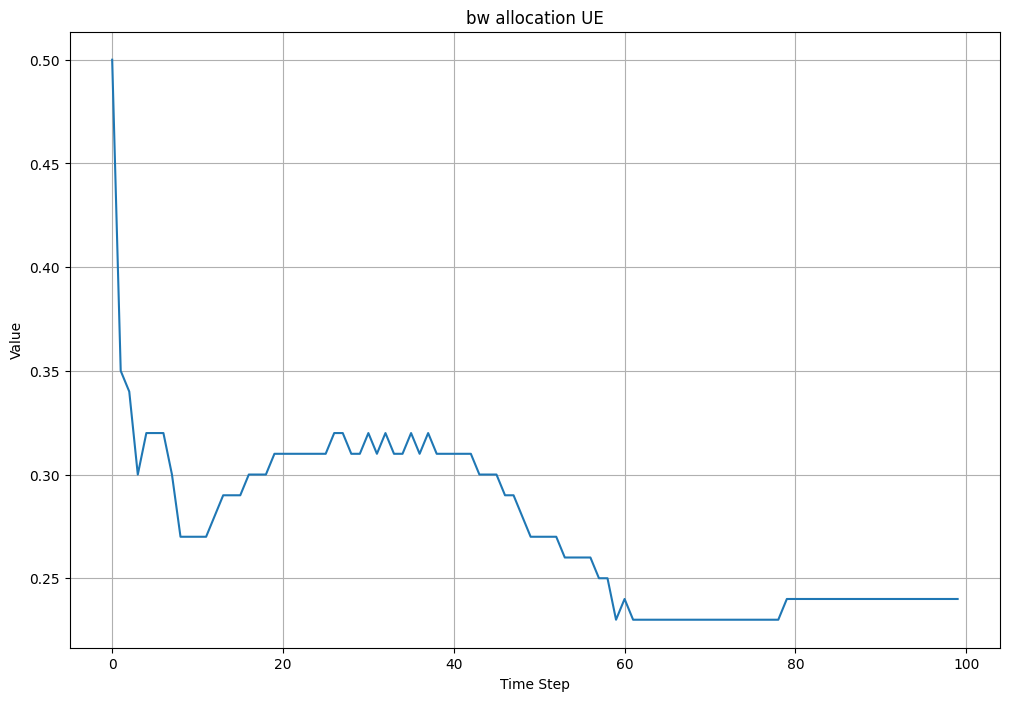

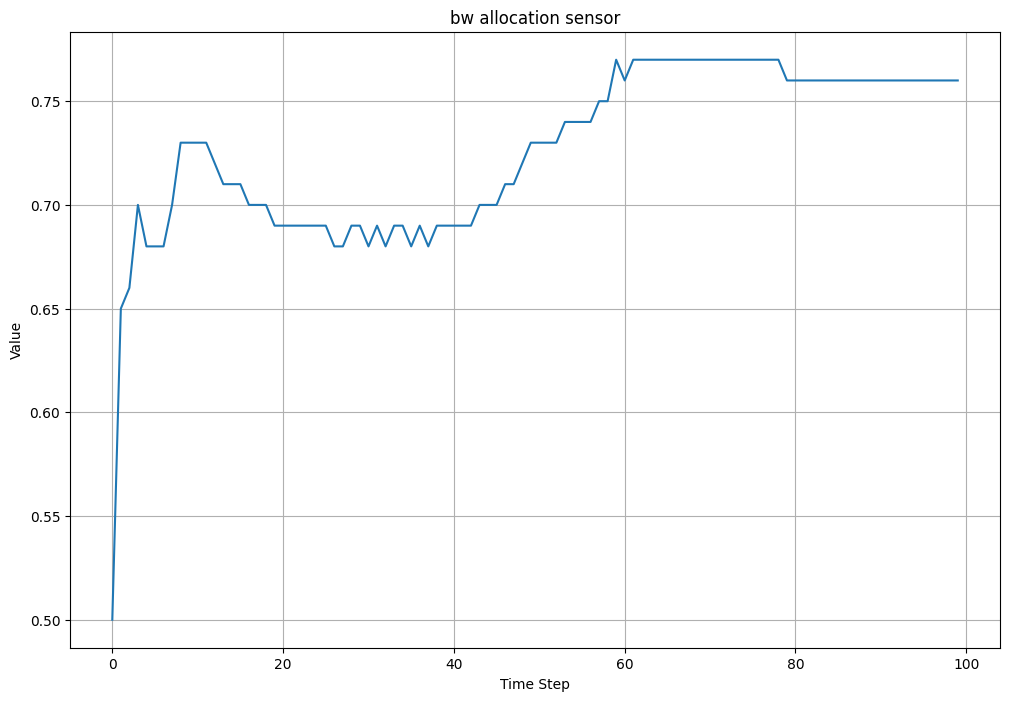

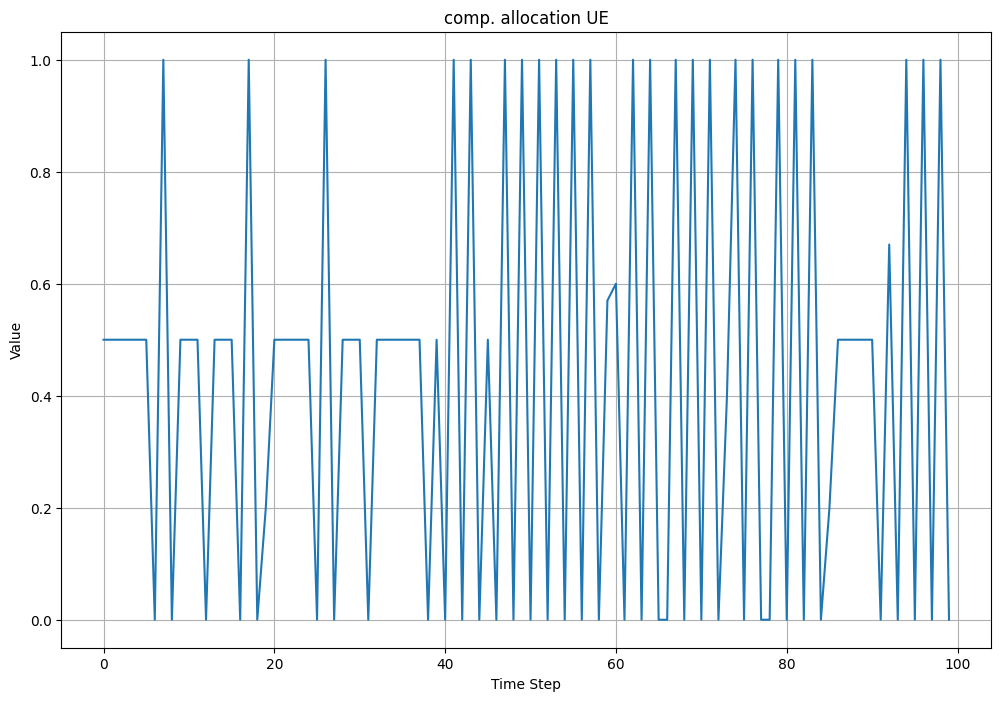

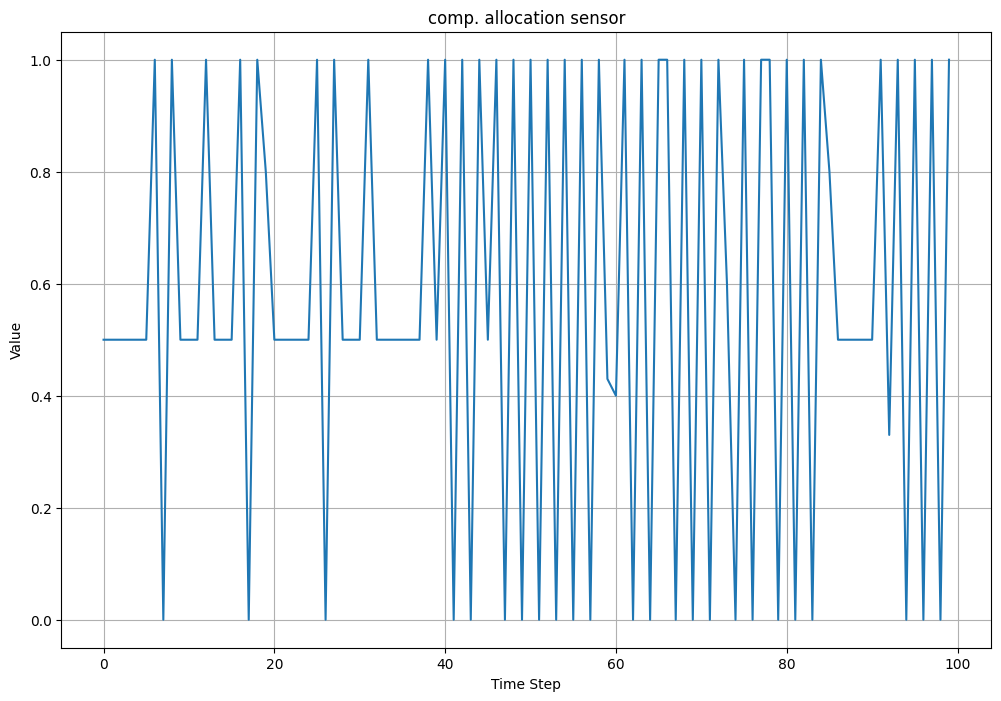

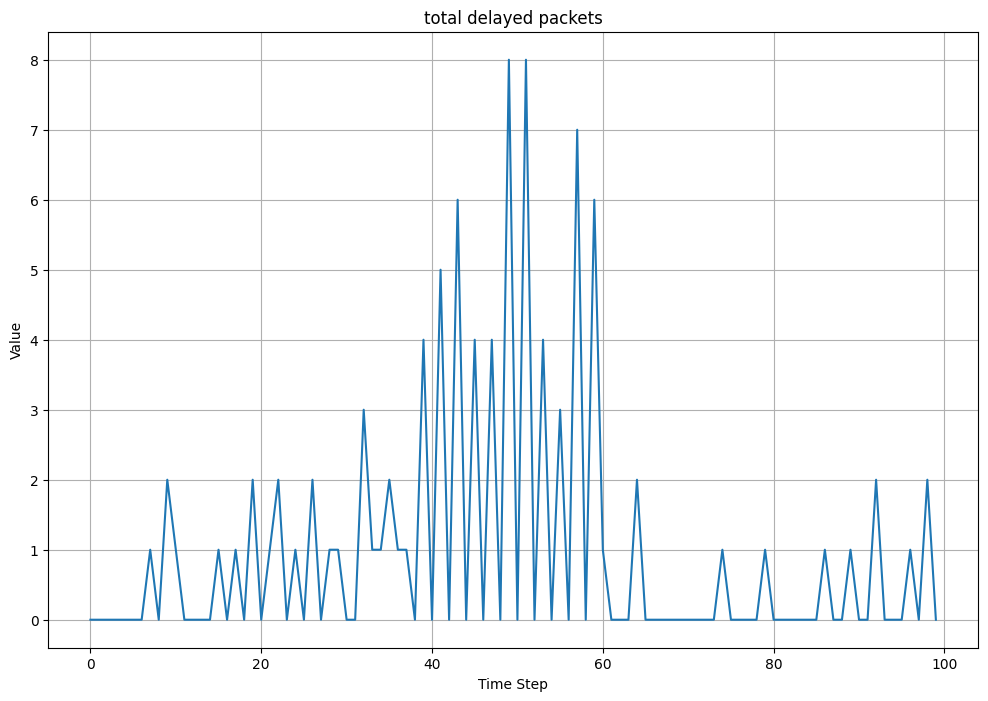

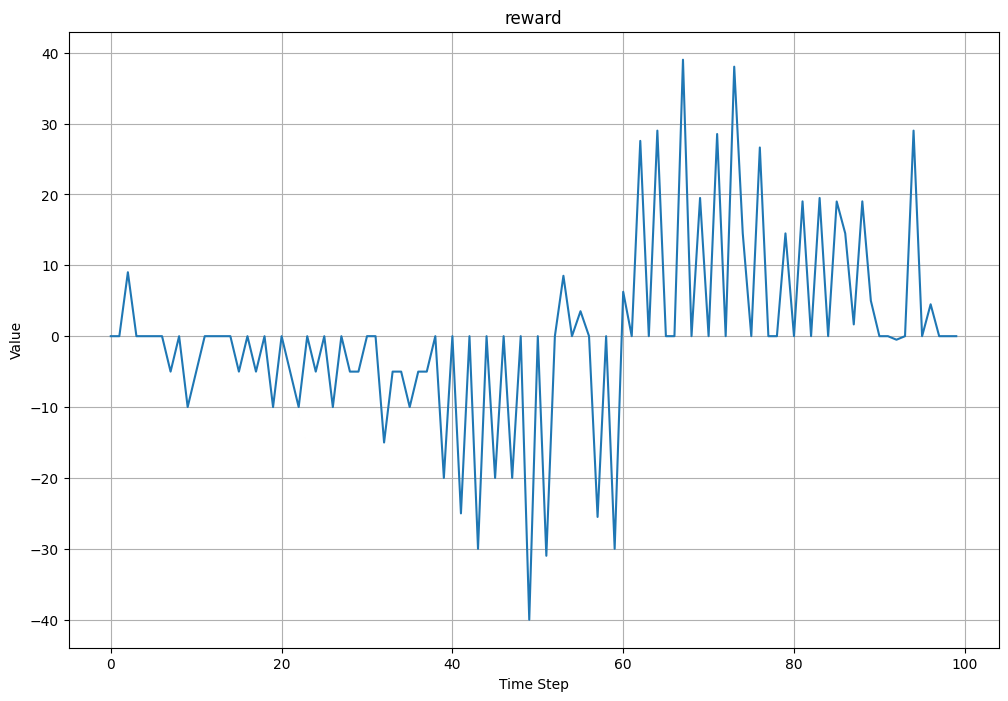

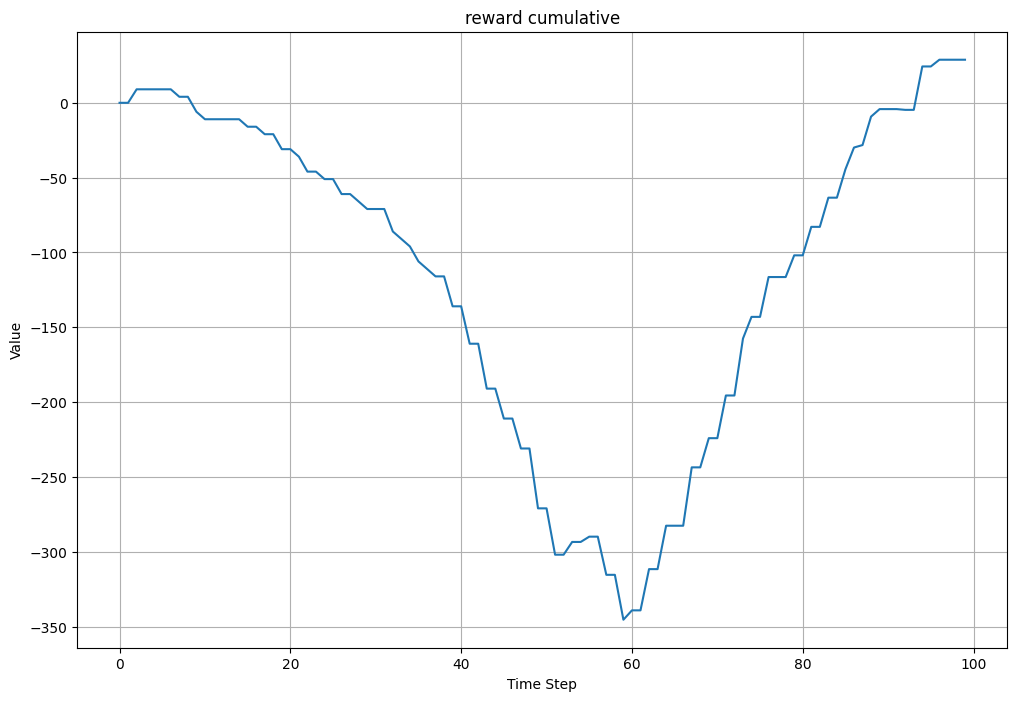

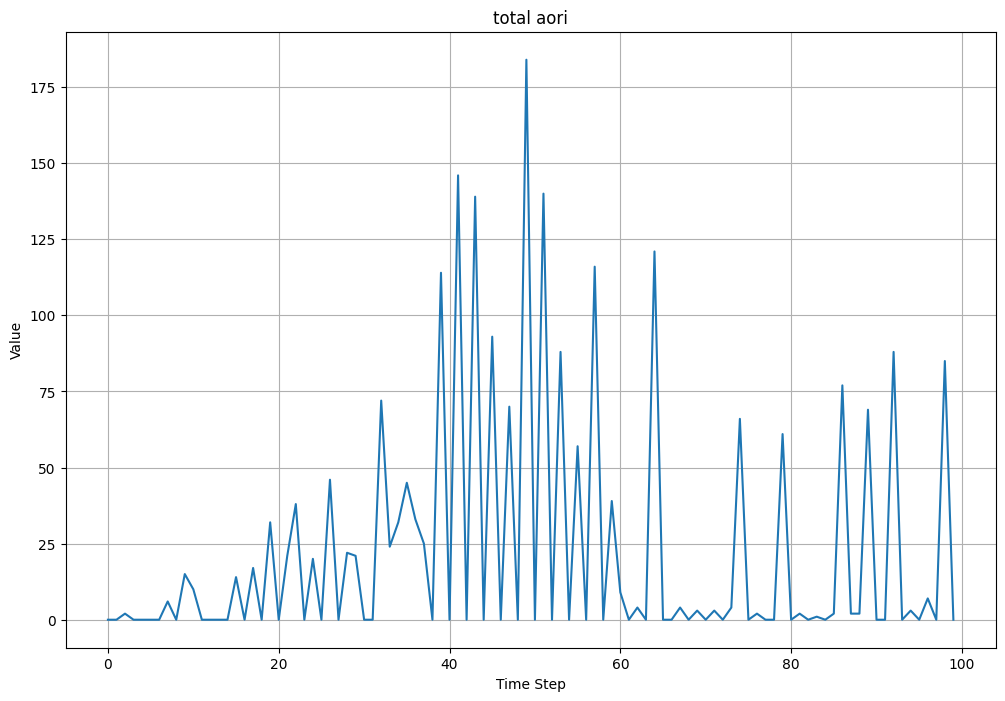

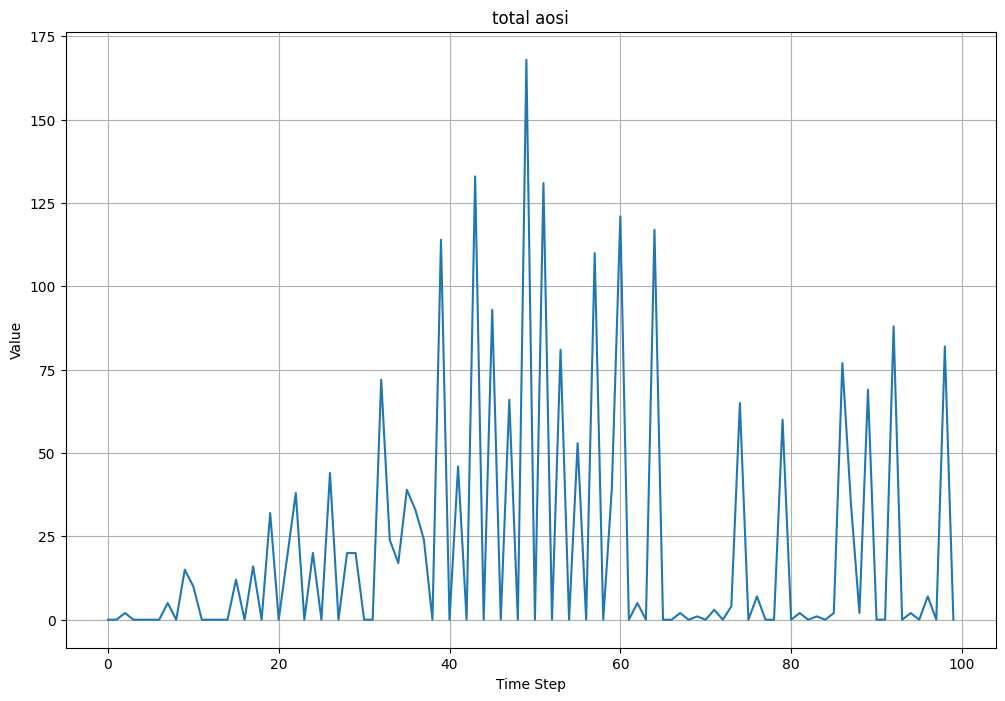

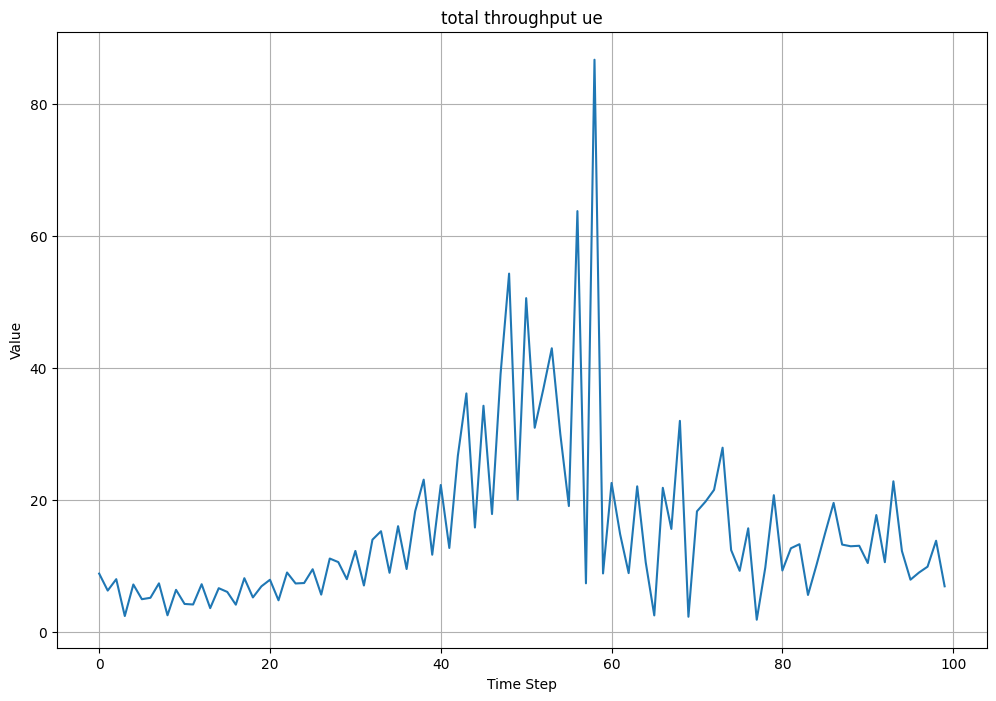

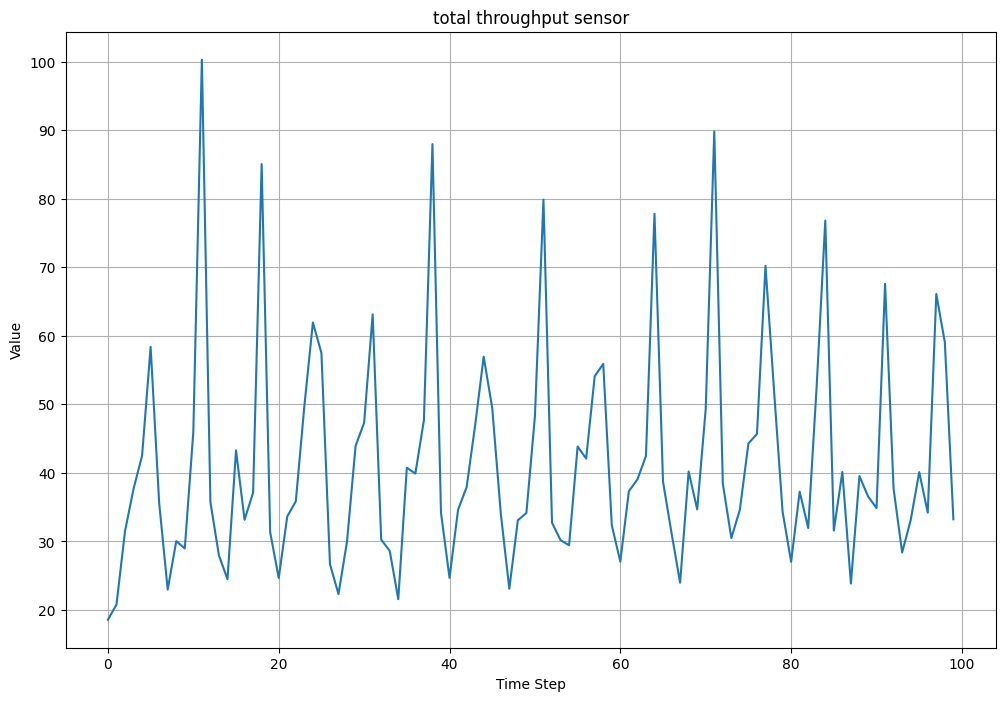

In [14]:
import matplotlib.pyplot as plt

def plot_kpi_metrics():
    # Plot kpi metrics
    for metric in kpi_results.columns:
        plt.figure(figsize=(12, 8))
        kpi_results[metric].plot()
        plt.title(f"{metric}")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.grid(True)
        plt.show()

plot_kpi_metrics()

In [15]:
import pandas as pd
import time

dummy_action = [0.50, 0.50]

# Reset environment and initialize variables
done = False
obs, info = env.reset()
all_kpi_means = []  # List to store mean metrics for each episode
episode_infos = []

# Run for 100 time steps for 100 episodes
for episode in range(100):
    obs, info = env.reset()
    print(f"Starting Episode {episode + 1}")
    episode_start_time = time.time()  # Start timing the episode

    for _ in range(100):
        obs, reward, terminated, truncated, info = env.step(tuple(dummy_action))

        # Get the latest metrics from the environment
        scalar_results, _, _, bs_results, _ = env.monitor.load_results()

        # Retrieve the last traffic requests for users (UEs) and sensors
        ue_traffic_requests = scalar_results["total traffic request ue"].iloc[-1]
        sensor_traffic_requests = scalar_results["total traffic request sensor"].iloc[-1]

        # Retrieve the last computation requests for users (UEs) and sensors
        ue_computation_requests =  bs_results["queue size transferred UE jobs"].iloc[-1]
        sensor_computation_requests = bs_results["queue size transferred sensor jobs"].iloc[-1]

        # Calculate the total traffic requests
        total_traffic_requests = ue_traffic_requests + sensor_traffic_requests

        # Calculate the total computation requests
        total_computation_requests = ue_computation_requests + sensor_computation_requests

        # Avoid division by zero
        if total_traffic_requests == 0:
            dummy_action[0] = 0.5  # Default split in case no traffic
        else:
            # Proportional allocation based on traffic requests
            dummy_action[0] = ue_traffic_requests / total_traffic_requests
        
        if total_computation_requests == 0:
            dummy_action[1] = 0.5
        else:
            dummy_action[1] = ue_computation_requests / total_computation_requests

        if terminated or truncated:
            break
  
    
    # Calculate and store the episode duration
    episode_duration = time.time() - episode_start_time
    print(f"Completed Episode {episode + 1}: {episode_duration}")

    # Load results after the episode
    _, kpi_results, _, _, _ = env.monitor.load_results()

    # Compute mean of metrics over the episode
    kpi_mean = kpi_results.mean()  # Calculate mean for each metric
    all_kpi_means.append(kpi_mean)

    # Add episode-level information to the list
    episode_info = {
        "Episode": episode + 1,
        "Total Reward": info.get("episode reward"),
        "Queue Size Transferred Jobs UE": info.get("bs trans. ue"),
        "Queue Size Transferred Jobs Sensor": info.get("bs trans. ss"),
        "Queue Size Accomplished Jobs UE": info.get("bs accomp. us"),
        "Queue Size Accomplished Jobs Sensor": info.get("bs accomp. ss"),
    }
    episode_infos.append(episode_info)

    print(f"Mean Reward for Episode: {episode_info['Total Reward']/100:.2f}")


# Convert all_kpi_means and episode_infos to DataFrames
episode_infos_df = pd.DataFrame(episode_infos)
all_kpi_means_df = pd.DataFrame(all_kpi_means)

# Display mean KPI metrics for each episode
print(episode_infos_df)
print(all_kpi_means_df)

# Save results to CSV files
episode_infos_df.to_csv("episode_infos.csv", index=False)
all_kpi_means_df.to_csv("kpi_means_per_episode.csv", index=False)

Starting Episode 1
Completed Episode 1: 1.6553258895874023
Mean Reward for Episode: 2.83
Starting Episode 2
Completed Episode 2: 1.6361472606658936
Mean Reward for Episode: 0.44
Starting Episode 3
Completed Episode 3: 1.64998197555542
Mean Reward for Episode: 1.53
Starting Episode 4
Completed Episode 4: 1.6727828979492188
Mean Reward for Episode: 1.30
Starting Episode 5
Completed Episode 5: 1.6518831253051758
Mean Reward for Episode: 3.77
Starting Episode 6
Completed Episode 6: 1.720047950744629
Mean Reward for Episode: 1.57
Starting Episode 7
Completed Episode 7: 1.6547012329101562
Mean Reward for Episode: 6.30
Starting Episode 8
Completed Episode 8: 1.7108311653137207
Mean Reward for Episode: -3.92
Starting Episode 9
Completed Episode 9: 1.7548558712005615
Mean Reward for Episode: -0.62
Starting Episode 10
Completed Episode 10: 1.764211893081665
Mean Reward for Episode: 4.39
Starting Episode 11
Completed Episode 11: 1.599755048751831
Mean Reward for Episode: -0.21
Starting Episode 12

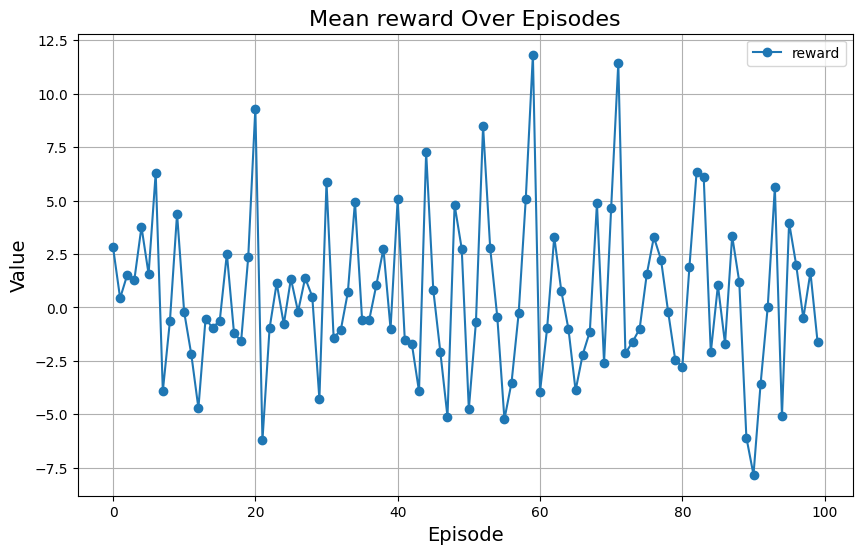

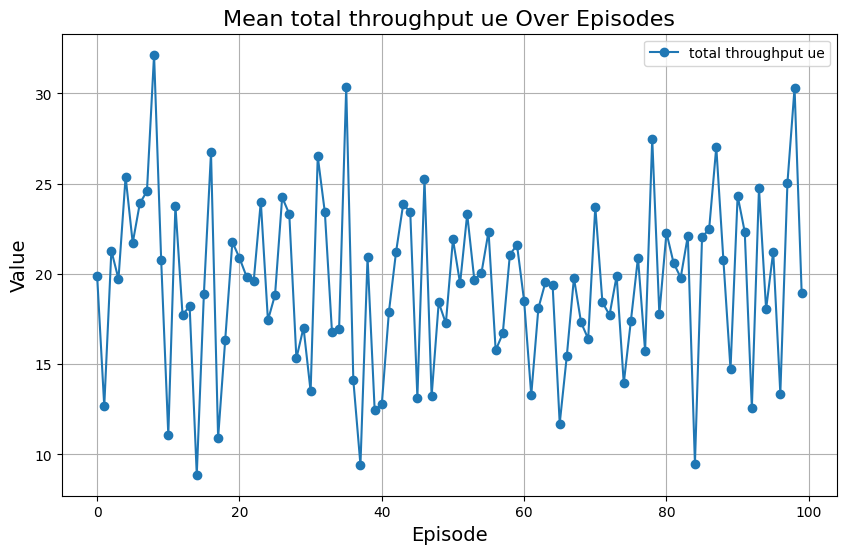

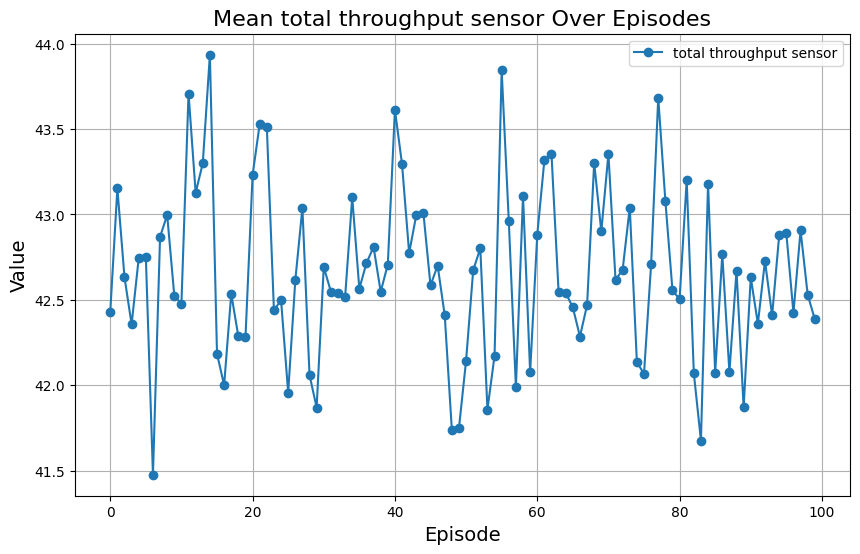

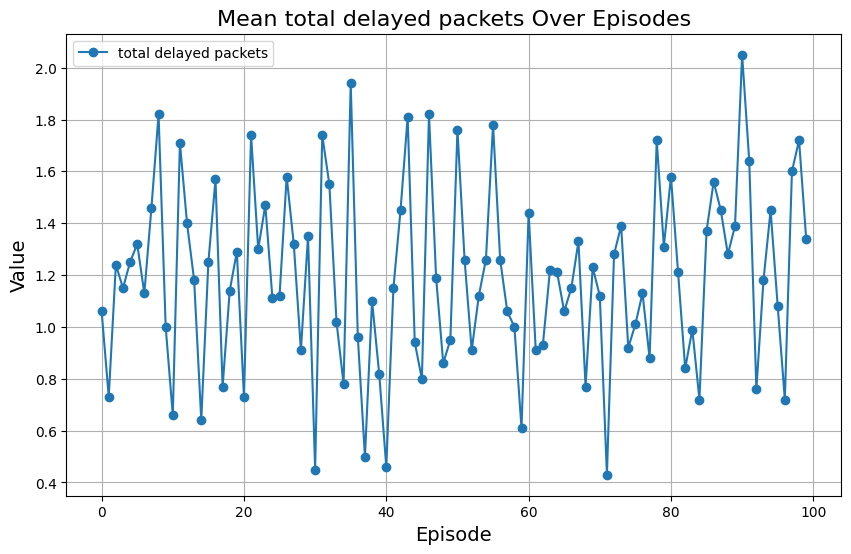

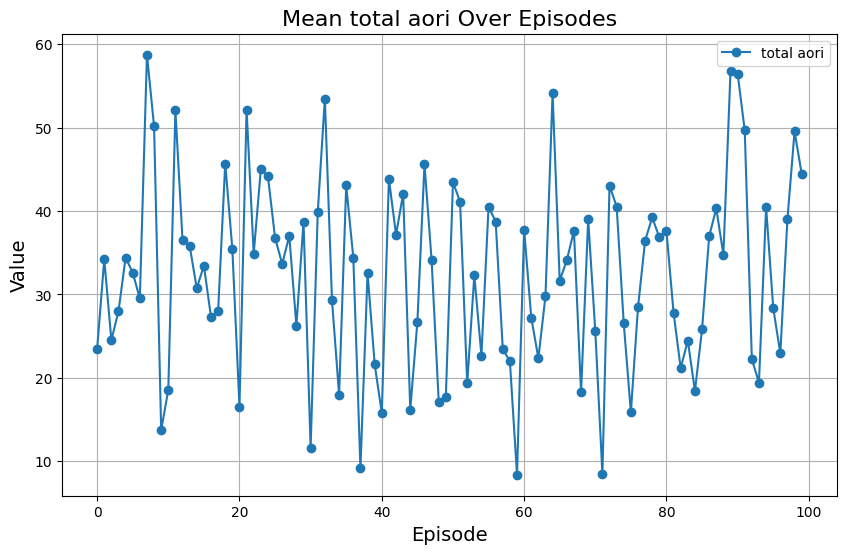

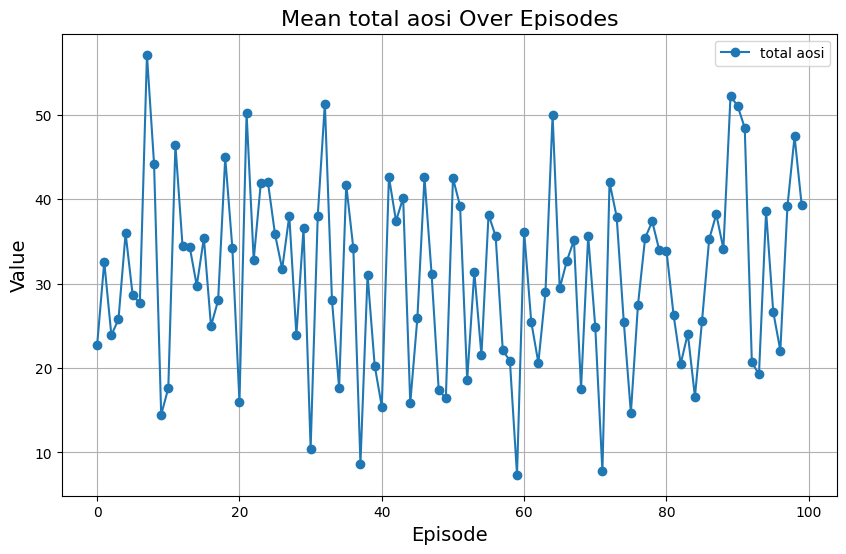

In [16]:
# Plot each metric in a separate plot
required_metrics = ["reward", "total throughput ue", "total throughput sensor", "total delayed packets", "total aori", "total aosi"]

for metric in required_metrics:
    plt.figure(figsize=(10, 6))
    plt.plot(all_kpi_means_df.index, all_kpi_means_df[metric], marker='o', label=metric)
    plt.title(f"Mean {metric} Over Episodes", fontsize=16)
    plt.xlabel("Episode", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()

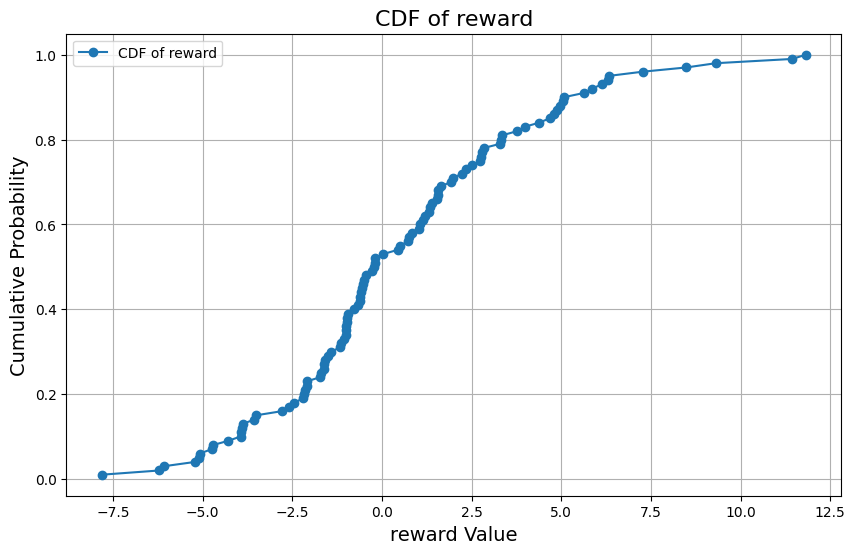

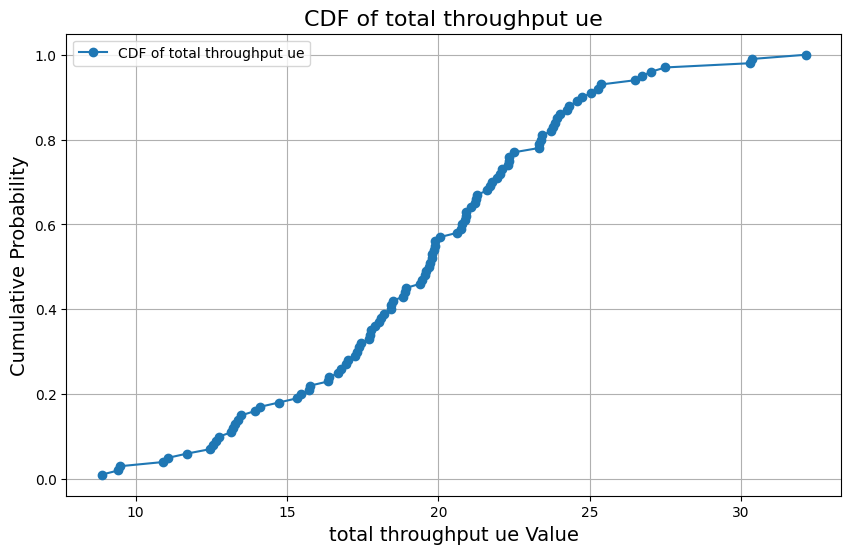

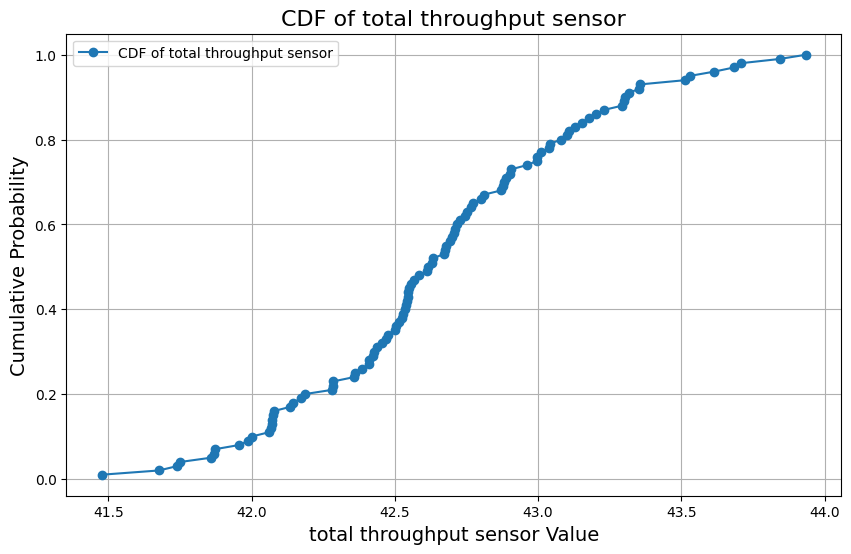

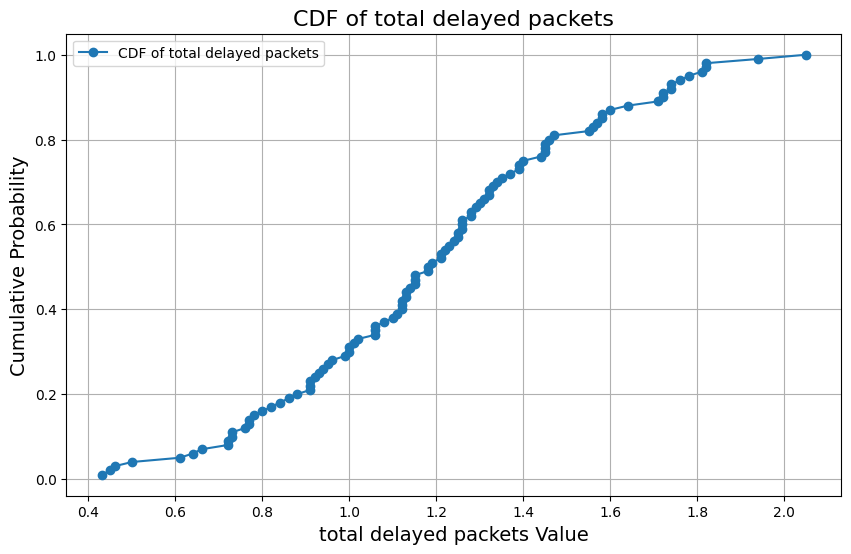

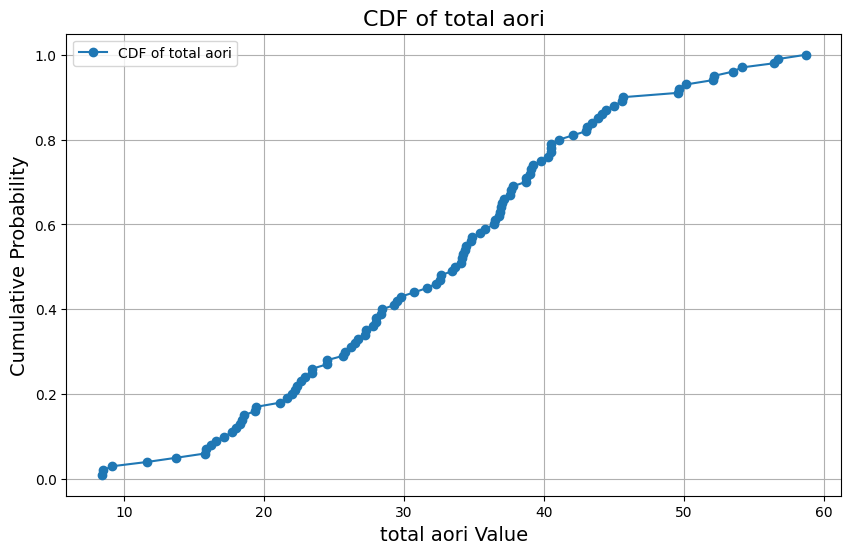

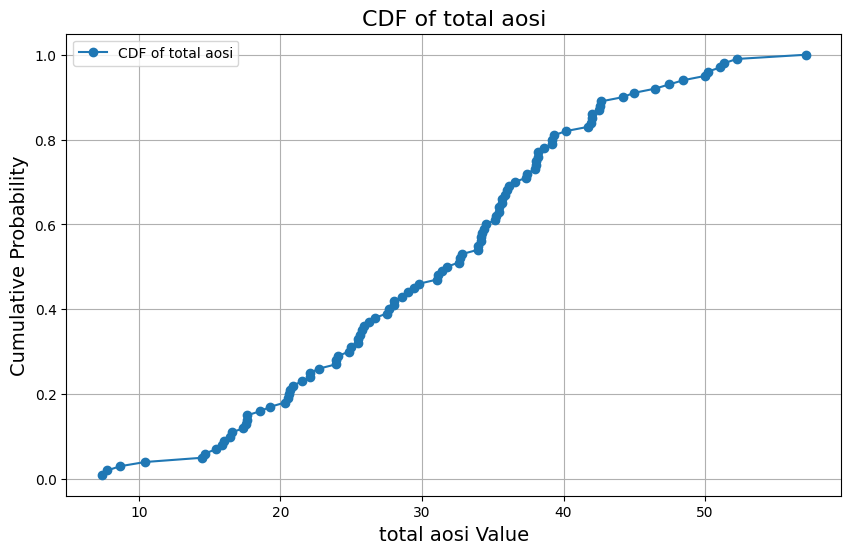

In [17]:
import numpy as np

# Function to calculate and plot the CDF for each metric
def plot_cdf_metrics(metrics_df, metrics_list):
    for metric in metrics_list:
        plt.figure(figsize=(10, 6))
        
        # Get the values for the metric
        metric_values = metrics_df[metric].dropna().values  # Drop NaN values
        
        # Sort the values and compute the CDF
        sorted_values = np.sort(metric_values)
        cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
        
        # Plot the CDF
        plt.plot(sorted_values, cdf, marker='o', label=f"CDF of {metric}")
        plt.title(f"CDF of {metric}", fontsize=16)
        plt.xlabel(f"{metric} Value", fontsize=14)
        plt.ylabel("Cumulative Probability", fontsize=14)
        plt.grid(True)
        plt.legend()
        plt.show()

# Metrics to plot
required_metrics = ["reward", "total throughput ue", "total throughput sensor", "total delayed packets", "total aori", "total aosi"]

# Call the CDF plot function
plot_cdf_metrics(all_kpi_means_df, required_metrics)
